In [116]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping





%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [117]:
src_dir = 'C:\\Users\\USER\\Desktop\\Rock-Paper-Scissors\\rps-cv-images'
src_dir_yehonatan = '/home/gentex/Rock-Paper-Scissors/Rock-Paper-Scissors/rps-cv-images/'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [118]:
labels = ['paper','scissors','rock']

In [119]:
def input_target_split(train_dirs, labels):
    dataset = []
    count = 0
    for label, train_dir in zip(labels, train_dirs):
        for image in os.listdir(train_dir):
            img = load_img(os.path.join(train_dir, image), target_size=(128, 128))
            img = img_to_array(img)
            img = img / 255.0
            dataset.append((img, count))
       
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [120]:
train_dirs = [paper_dir, scissors_dir, rock_dir]

data_rps, labels_rps = input_target_split(train_dirs,labels)

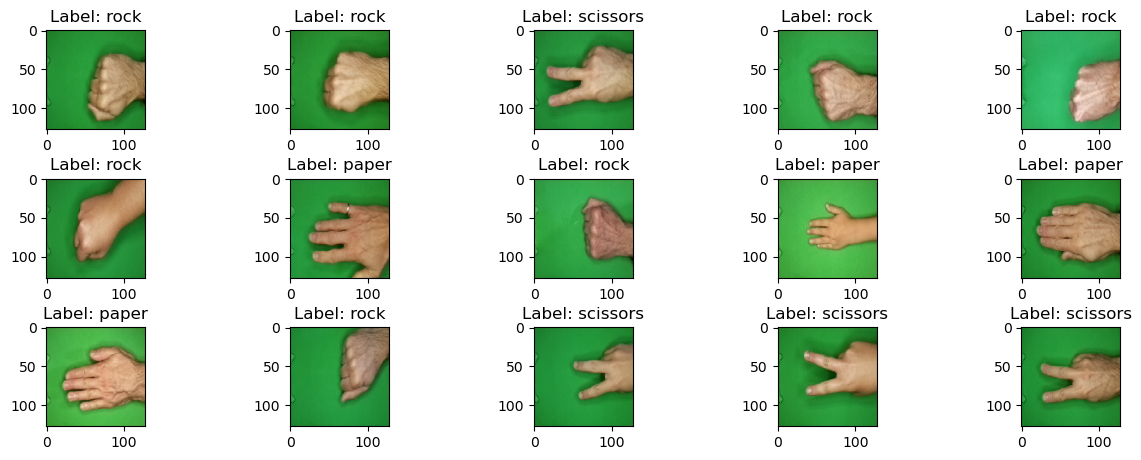

In [121]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data_rps[i])
    plt.title(f'Label: {labels[labels_rps[i]]}')

# Label_names:
- 0: paper
- 1: scissors 
- 2: rock

In [122]:
data_rps_reshaped = data_rps.reshape(data_rps.shape[0], -1)

# Create a DataFrame with X_reshaped and y
df = pd.DataFrame(data=np.column_stack((data_rps_reshaped, labels_rps)), columns=[f'pixel_{i}' for i in range(data_rps_reshaped.shape[1])] + ['label'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_49143,pixel_49144,pixel_49145,pixel_49146,pixel_49147,pixel_49148,pixel_49149,pixel_49150,pixel_49151,label
0,0.145098,0.474510,0.149020,0.125490,0.470588,0.149020,0.133333,0.478431,0.156863,0.133333,...,0.141176,0.486275,0.168627,0.149020,0.486275,0.160784,0.141176,0.486275,0.168627,2.0
1,0.145098,0.458824,0.149020,0.133333,0.458824,0.145098,0.129412,0.454902,0.141176,0.137255,...,0.156863,0.490196,0.129412,0.156863,0.486275,0.137255,0.149020,0.482353,0.129412,2.0
2,0.141176,0.462745,0.168627,0.137255,0.450980,0.160784,0.137255,0.458824,0.164706,0.137255,...,0.152941,0.498039,0.176471,0.152941,0.494118,0.184314,0.152941,0.498039,0.176471,1.0
3,0.180392,0.525490,0.203922,0.180392,0.525490,0.203922,0.168627,0.513726,0.196078,0.184314,...,0.211765,0.580392,0.235294,0.219608,0.568627,0.227451,0.223529,0.572549,0.235294,2.0
4,0.211765,0.619608,0.313726,0.203922,0.635294,0.329412,0.200000,0.631373,0.317647,0.203922,...,0.192157,0.596078,0.290196,0.196078,0.592157,0.282353,0.192157,0.588235,0.278431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.058824,0.411765,0.090196,0.070588,0.423529,0.098039,0.070588,0.435294,0.105882,0.074510,...,0.050980,0.376471,0.062745,0.050980,0.368627,0.050980,0.047059,0.364706,0.043137,0.0
2184,0.196078,0.552941,0.219608,0.188235,0.556863,0.219608,0.196078,0.552941,0.219608,0.200000,...,0.203922,0.588235,0.247059,0.219608,0.592157,0.262745,0.207843,0.580392,0.250980,2.0
2185,0.211765,0.603922,0.309804,0.203922,0.615686,0.309804,0.203922,0.615686,0.309804,0.203922,...,0.239216,0.670588,0.364706,0.247059,0.662745,0.360784,0.243137,0.654902,0.356863,0.0
2186,0.164706,0.470588,0.152941,0.156863,0.466667,0.156863,0.145098,0.454902,0.137255,0.164706,...,0.168627,0.498039,0.156863,0.180392,0.494118,0.156863,0.176471,0.498039,0.156863,0.0


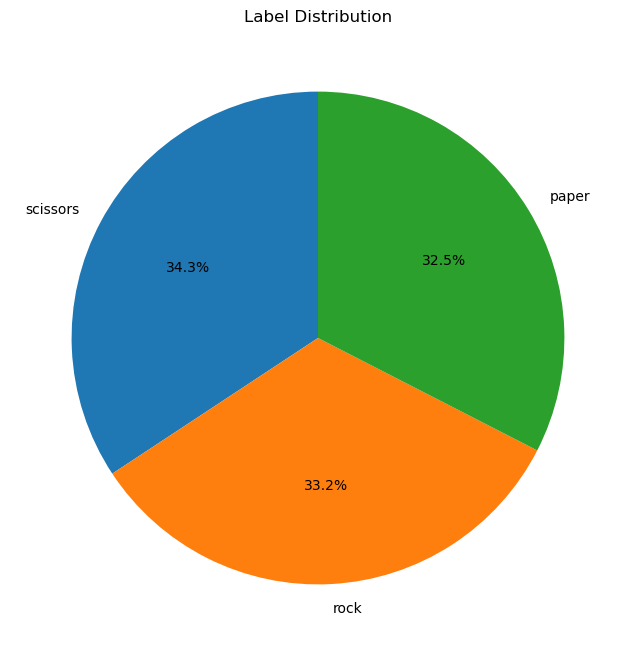

In [123]:

labels_num = df['label']

# Create a dictionary to map numerical labels to class names
label_names = {0: 'paper', 1: 'scissors', 2: 'rock'}

# Map numerical labels to class names in labels_num
class_labels = [label_names[label] for label in labels_num]

# Count the occurrences of each label
label_counts = pd.Series(class_labels).value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.show()

## We can understand is balanced, So we don't need to adjust it

In [124]:
print(data_rps.shape)
print(labels_rps.shape)

(2188, 128, 128, 3)
(2188,)


## We will convert the images from RGB to gray scale

In [125]:
# def convert_to_gray(images):
#     gray_images = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images]
#     return np.array(gray_images)

# # Convert data_rps to grayscale
# data_rps_gray = convert_to_gray(data_rps)

# # Check the new shape
# print(data_rps_gray.shape)

In [126]:
# num_images_to_display = 5
# for i in range(num_images_to_display):
#     plt.subplot(1, num_images_to_display, i + 1)
#     plt.imshow(data_rps_gray[i], cmap='gray')
#     plt.axis('off')

# plt.show()

In [127]:
# data_rps_gray = data_rps_gray.reshape((2188, 128*128))

## Split the data

In [128]:
# X_train, X_test, y_train, y_test = train_test_split(data_rps_gray, labels_rps, test_size=0.25, random_state=42)
# print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data_rps, labels_rps, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([550, 545, 546], dtype=int64)) (array([0, 1, 2]), array([162, 205, 180], dtype=int64))


## Dummy model

In [130]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_test),4))

The DummyClassifier score is: 0.2962


## Split the train

In [131]:
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

## Logistic Regression

In [132]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ensure labels are in the correct format and range
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Define input shape
input_shape = (128*128*3,)

# Define the number of classes
num_classes = 3

# Define the logistic regression model with softmax activation for multi-class classification
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Compile the model with appropriate loss function for multi-class classification
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flat, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test_encoded)
print(f'\nTest Accuracy: {test_acc}')


Epoch 1/100
41/41 [==============================] - 1s 11ms/step - loss: 23.1238 - accuracy: 0.3674 - val_loss: 7.3851 - val_accuracy: 0.4255
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 14.6006 - accuracy: 0.4604 - val_loss: 2.9213 - val_accuracy: 0.7295
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 8.6911 - accuracy: 0.5854 - val_loss: 2.5841 - val_accuracy: 0.7508
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 4.9430 - accuracy: 0.6745 - val_loss: 3.7238 - val_accuracy: 0.7052
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 5.0906 - accuracy: 0.6700 - val_loss: 4.1065 - val_accuracy: 0.6596
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 6.2068 - accuracy: 0.6235 - val_loss: 4.0522 - val_accuracy: 0.6900
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 4.5687 - accuracy: 0.7233 - val_loss: 6.3663 - val_accuracy: 0.5714
Epoch 8/10

Epoch 59/100
41/41 [==============================] - 0s 7ms/step - loss: 1.4803 - accuracy: 0.8476 - val_loss: 8.6895 - val_accuracy: 0.6170
Epoch 60/100
41/41 [==============================] - 0s 7ms/step - loss: 0.7536 - accuracy: 0.9200 - val_loss: 0.7932 - val_accuracy: 0.8936
Epoch 61/100
41/41 [==============================] - 0s 7ms/step - loss: 0.4562 - accuracy: 0.9238 - val_loss: 0.8043 - val_accuracy: 0.8936
Epoch 62/100
41/41 [==============================] - 0s 7ms/step - loss: 1.0643 - accuracy: 0.8674 - val_loss: 0.8237 - val_accuracy: 0.8875
Epoch 63/100
41/41 [==============================] - 0s 7ms/step - loss: 1.7481 - accuracy: 0.8476 - val_loss: 14.1566 - val_accuracy: 0.4742
Epoch 64/100
41/41 [==============================] - 0s 7ms/step - loss: 2.2195 - accuracy: 0.8186 - val_loss: 0.8797 - val_accuracy: 0.8936
Epoch 65/100
41/41 [==============================] - 0s 7ms/step - loss: 0.9972 - accuracy: 0.8826 - val_loss: 4.2063 - val_accuracy: 0.6353
Epoch

## Convolutional neural network (CNN)


## Without cross validation

In [133]:
# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Split the data into training and validation sets
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_reshaped, y_train, test_size=0.25, random_state=42)




1. **Conv2D Layer:**
   - `32`: This is the number of filters (or kernels) in the convolutional layer. It determines the number of features the model will learn.
   - `(3, 3)`: The size of the convolutional window (filter) that slides over the input. A larger window captures more complex patterns but also increases computation. A common choice is (3, 3).

2. **MaxPooling2D Layer:**
   - `(2, 2)`: The size of the max pooling window. Max pooling reduces the spatial dimensions of the representation and therefore computation in the network.

3. **Flatten Layer:**
   - This layer is used to flatten the input. It converts the multi-dimensional data into a one-dimensional array before feeding it into the dense layers.

4. **Dense Layers:**
   - `64`: The number of neurons (units) in the dense layer. This layer is fully connected, meaning each neuron in the layer is connected to every neuron in the previous layer.
   - `relu`: Rectified Linear Unit (ReLU) is the activation function applied to the output of each neuron in the layer. ReLU is commonly used in hidden layers to introduce non-linearity.

5. **Dense Output Layer:**
   - `3`: The number of output neurons, corresponding to the number of classes in your classification task (assuming it's a multi-class classification). In your case, it's 3 for 'paper', 'scissors', and 'rock'.
   - `softmax`: Activation function for the output layer in multi-class classification problems. It normalizes the output values into a probability distribution, making it suitable for classification.

6. **Optimizer:**
   - `adam`: Stochastic Gradient Descent (SGD) optimization algorithm. It adapts the learning rates of each parameter individually, providing a balance between the benefits of both AdaGrad and RMSProp.

7. **Loss Function:**
   - `sparse_categorical_crossentropy`: This loss function is suitable for multi-class classification problems. It calculates the cross-entropy loss between the true labels and predicted labels.

8. **Metrics:**
   - `accuracy`: A metric that measures the accuracy of the model on the training and validation sets. It represents the proportion of correctly classified instances.

These hyperparameters are chosen based on empirical observations, experimentation, and best practices in the field. It's common to start with a set of values that are known to work well for similar problems and then fine-tune based on the model's performance. Grid search or random search can also be used to explore different combinations of hyperparameters more systematically.

In [134]:
# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax')) 
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    
    return model

In [135]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 147459    
                                                                 
Total params: 147,459
Trainable params: 147,459
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Create and train the CNN model
model = create_cnn_model()
model.fit(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold))
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X_train_fold, y_train_fold, epochs=100, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
39/39 [==============================] - 9s 214ms/step - loss: 1.7185 - accuracy: 0.5431 - val_loss: 0.7115 - val_accuracy: 0.7664
Epoch 2/10
39/39 [==============================] - 9s 220ms/step - loss: 0.5892 - accuracy: 0.7894 - val_loss: 0.4549 - val_accuracy: 0.8613
Epoch 3/10
39/39 [==============================] - 8s 214ms/step - loss: 0.3919 - accuracy: 0.8764 - val_loss: 0.3724 - val_accuracy: 0.8832
Epoch 4/10
39/39 [==============================] - 9s 225ms/step - loss: 0.2903 - accuracy: 0.9187 - val_loss: 0.3086 - val_accuracy: 0.8881
Epoch 5/10
39/39 [==============================] - 8s 204ms/step - loss: 0.2373 - accuracy: 0.9301 - val_loss: 0.3487 - val_accuracy: 0.8881
Epoch 6/10
39/39 [==============================] - 8s 203ms/step - loss: 0.1978 - accuracy: 0.9358 - val_loss: 0.2523 - val_accuracy: 0.9270
Epoch 7/10
39/39 [==============================] - 8s 204ms/step - loss: 0.1149 - accuracy: 0.9715 - val_loss: 0.2714 - val_accuracy: 0.9148
Epoch 

In [112]:
# # Define early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X_train_fold, y_train_fold, epochs=20, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], batch_size=32)

Epoch 1/20
39/39 [==============================] - 8s 205ms/step - loss: 0.7325 - accuracy: 0.7163 - val_loss: 0.6518 - val_accuracy: 0.7786
Epoch 2/20
39/39 [==============================] - 8s 209ms/step - loss: 0.5397 - accuracy: 0.8276 - val_loss: 0.5605 - val_accuracy: 0.8345
Epoch 3/20
39/39 [==============================] - 8s 201ms/step - loss: 0.4725 - accuracy: 0.8439 - val_loss: 0.7448 - val_accuracy: 0.7591
Epoch 4/20
39/39 [==============================] - 8s 207ms/step - loss: 0.3777 - accuracy: 0.8805 - val_loss: 0.3956 - val_accuracy: 0.8783
Epoch 5/20
39/39 [==============================] - 8s 205ms/step - loss: 0.3117 - accuracy: 0.9130 - val_loss: 0.3581 - val_accuracy: 0.8978
Epoch 6/20
39/39 [==============================] - 8s 209ms/step - loss: 0.2324 - accuracy: 0.9374 - val_loss: 0.3252 - val_accuracy: 0.9027
Epoch 7/20
39/39 [==============================] - 8s 205ms/step - loss: 0.2104 - accuracy: 0.9423 - val_loss: 0.2794 - val_accuracy: 0.9221
Epoch 

## With cross validation

In [140]:
# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store loss and accuracy values during training
losses = []
accuracies = []

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')

    # Store loss and accuracy values
    losses.extend(history.history['loss'])
    accuracies.extend(history.history['accuracy'])




Epoch 1/10
41/41 [==============================] - 10s 228ms/step - loss: 1.7450 - accuracy: 0.5381 - val_loss: 0.7028 - val_accuracy: 0.8085
Epoch 2/10
41/41 [==============================] - 9s 218ms/step - loss: 0.5904 - accuracy: 0.8087 - val_loss: 0.5178 - val_accuracy: 0.8298
Epoch 3/10
41/41 [==============================] - 9s 220ms/step - loss: 0.4466 - accuracy: 0.8598 - val_loss: 0.3570 - val_accuracy: 0.8754
Epoch 4/10
41/41 [==============================] - 9s 214ms/step - loss: 0.2917 - accuracy: 0.9078 - val_loss: 0.3050 - val_accuracy: 0.9240
Epoch 5/10
41/41 [==============================] - 9s 218ms/step - loss: 0.2321 - accuracy: 0.9322 - val_loss: 0.2540 - val_accuracy: 0.9179
Epoch 6/10
41/41 [==============================] - 9s 215ms/step - loss: 0.1698 - accuracy: 0.9474 - val_loss: 0.2929 - val_accuracy: 0.8815
Epoch 7/10
41/41 [==============================] - 9s 210ms/step - loss: 0.1386 - accuracy: 0.9566 - val_loss: 0.2547 - val_accuracy: 0.9027
Epoch

## There is improvement with cross validation

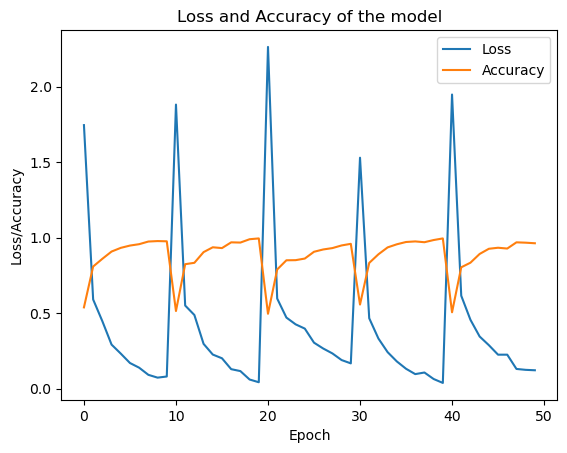

In [141]:
# Plot the loss and the accuracy
plt.figure()  # Create a new figure
plt.plot(losses)
plt.plot(accuracies)
plt.title('Loss and Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(['Loss', 'Accuracy'])
plt.show()

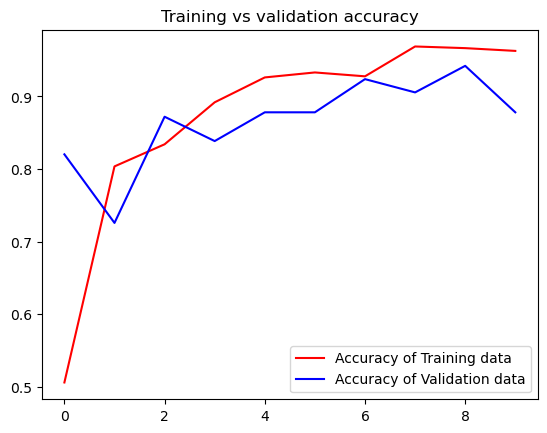

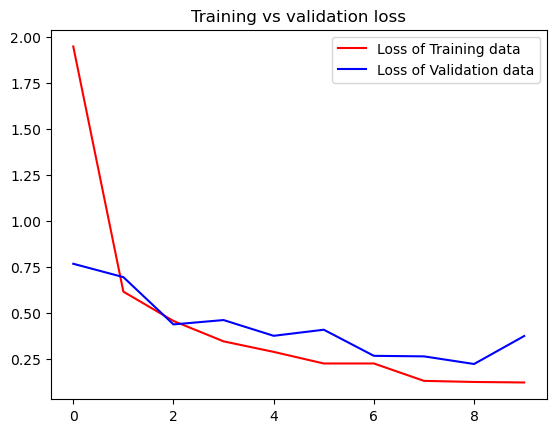

In [142]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))

# Plotting accuracy
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.show()

# Plotting loss
plt.figure()
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.show()


18/18 [==============================] - 1s 37ms/step


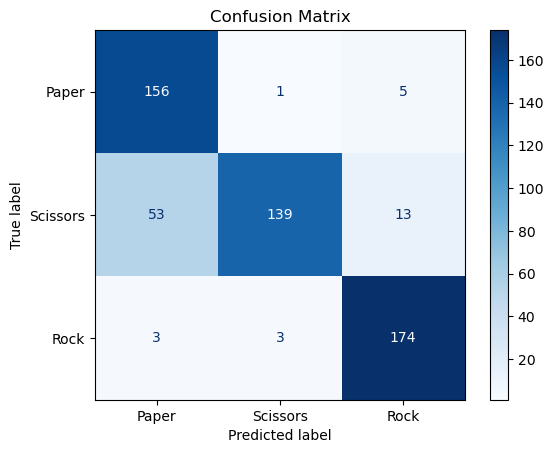

In [143]:
# Predict the labels for the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
labels = ['Paper', 'Scissors', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()